In [17]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def generate_click_train(num_clicks, spacing_ms, click_duration_ms, mute_click=None, sample_rate=44100):
    """
    Generates an auditory click train ensuring the first click starts with a moment of silence.

    Parameters:
    - num_clicks: Number of clicks in the train.
    - spacing_ms: Time between clicks in milliseconds.
    - click_duration_ms: Duration of each click in milliseconds.
    - mute_click: The 1-based index of the click to mute. If None, no click is muted.
    - sample_rate: The sample rate in samples per second.

    Returns:
    - A numpy array containing the click train.
    """
    # Convert times from milliseconds to samples
    spacing_samples = int(spacing_ms / 1000 * sample_rate)
    click_duration_samples = int(click_duration_ms / 1000 * sample_rate)

    # Ensure there's a moment of silence at the beginning by starting the first click after a brief silence
    initial_silence_samples = 1  # One sample of silence at the very beginning

    # Total length of the click train in samples
    total_length_samples = num_clicks * spacing_samples + click_duration_samples + initial_silence_samples

    # Create an array of zeros for the silent parts
    click_train = np.zeros(total_length_samples)

    # Generate each click, starting with a brief moment of silence
    for i in range(num_clicks):
        start_sample = i * spacing_samples + initial_silence_samples
        end_sample = start_sample + click_duration_samples

        # If this click is not muted, insert it into the click train
        if i + 1 != mute_click:
            click_train[start_sample:end_sample] = 1  # Click set to peak amplitude

    # Normalize to prevent clipping
    click_train /= np.max(np.abs(click_train))

    return click_train

# Example usage
num_clicks = 5
spacing_ms = 25  # 500 milliseconds between clicks
click_duration_ms = 5  # Each click lasts for 50 milliseconds
mute_click = 3  # Mute the third click

click_train = generate_click_train(num_clicks, spacing_ms, click_duration_ms, mute_click)
filename = "click_train_dev.wav"
sf.write(filename, click_train, 44100)

print(f"Click train generated and saved to {filename}.")


Click train generated and saved to click_train_dev.wav.


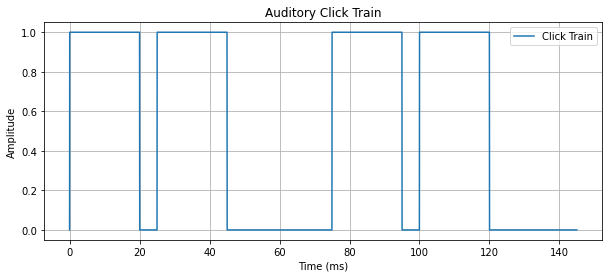

In [14]:
import matplotlib.pyplot as plt

def plot_click_train(click_train, sample_rate=44100):
    """
    Plots the generated click train.

    Parameters:
    - click_train: The numpy array containing the click train.
    - sample_rate: The sample rate in samples per second.
    """
    # Generate time axis in milliseconds
    time_ms = np.linspace(0, len(click_train) / sample_rate * 1000, len(click_train))

    plt.figure(figsize=(10, 4))
    plt.plot(time_ms, click_train, label='Click Train')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.title('Auditory Click Train')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
num_clicks = 5
spacing_ms = 25  # 500 milliseconds between clicks
click_duration_ms = 20  # Each click lasts for 50 milliseconds
mute_click = 3  # Mute the third click

click_train = generate_click_train(num_clicks, spacing_ms, click_duration_ms, mute_click)

# Plot the generated click train
plot_click_train(click_train)


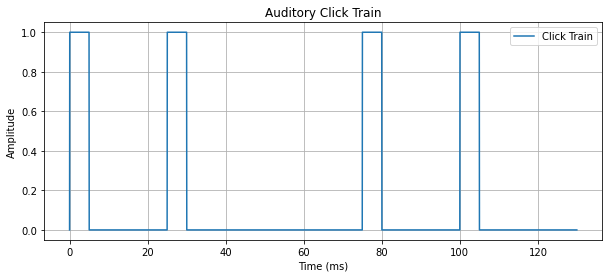

In [18]:

# Plot the generated click train
plot_click_train(click_train)